# Árboles de Decisión - Parte I (1)
Utiliza el conjunto de datos "iris" cargado previamente en el dataframe

```
from iris_info import iris_dict
# Convertir el diccionario a DataFrame
iris_df = pd.DataFrame(iris_dict)
```

Realiza los siguientes pasos:

1. Crea un histograma para la distribución de la longitud de sépalo `"sepal_length"`

2. Usa el color azul para las barras del histograma

3. Titulo del gráfico: `'Distribución de la longitud de sépalo'`

4. Eje x: `'Longitud de sépalo'`

5. Eje y: `'Frecuencia'`

6. Activa la rejilla del gráfico (`grid`)

<function matplotlib.pyplot.show(close=None, block=None)>

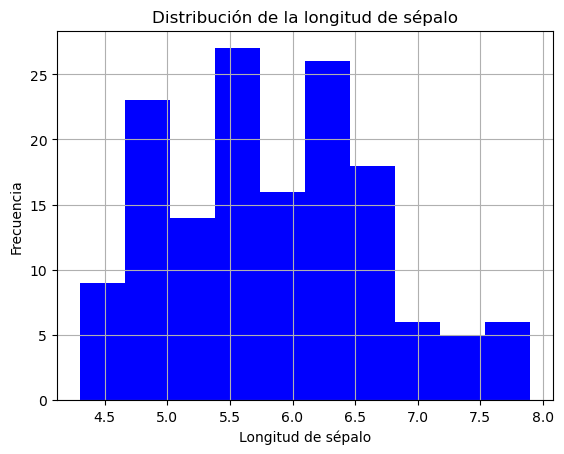

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from data.iris_info import iris_dict
# from iris_info import iris_dict  # Udemy usa esto!!


# Convertir el diccionario a DataFrame
iris_df: pd.DataFrame = pd.DataFrame(iris_dict)

plt.hist(iris_df['sepal_length'], color='blue')
plt.title('Distribución de la longitud de sépalo')
plt.xlabel('Longitud de sépalo')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show


# Árboles de Decisión - Parte I (2)
Utiliza el conjunto de datos "iris" cargado previamente en el dataframe

```
from iris_info import iris_dict
# Convertir el diccionario a DataFrame
iris_df = pd.DataFrame(iris_dict)
```

Realiza los siguientes pasos:

Prepara el DataFrame para modelado, eliminando la columna `'species'` y usando el resto como características (almacénalo en la variable `X`).

Inicializa el codificador de etiquetas y transforma las etiquetas categóricas de especies en valores numéricos. (Almacénalo en la variable `y`). Utiliza `LabelEncoder` de scikit-learn para transformar las etiquetas de especies de texto a valores numéricos. Esto es necesario para entrenar el modelo de árbol de decisión.

**Visualización:**

Genera un gráfico de dispersión (`scatter`) para visualizar la relación entre la longitud del sépalo y las especies codificadas `X` y `y`.

Utiliza `c=y`, para colorear los puntos según la codificación de especies.

Añade una barra de colores al gráfico para indicar qué color corresponde a cada especie codificada. La barra debe tener el siguiente título: `'Especies codificadas'`

Titulo del gráfico: `'Relación entre la longitud del sépalo y las especies codificadas'`

Eje x: `'Longitud del Sépalo (cm)'`

Eje y: `'Especies codificadas'`

Activa la rejilla del gráfico (`grid`)

<function matplotlib.pyplot.show(close=None, block=None)>

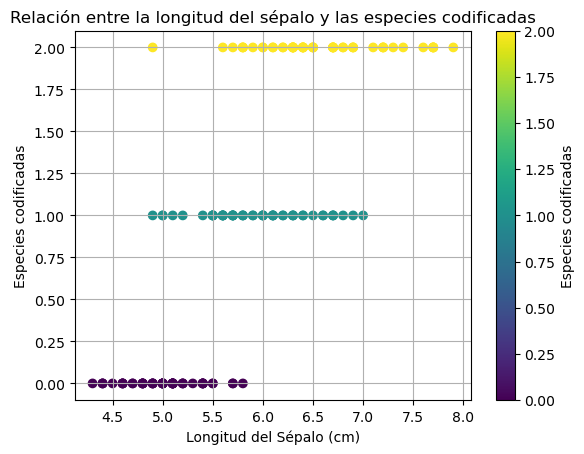

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from data.iris_info import iris_dict
# from iris_info import iris_dict  # Udemy usa esto!!
from sklearn.preprocessing import LabelEncoder


# Convertir el diccionario a DataFrame
iris_df: pd.DataFrame = pd.DataFrame(iris_dict)

X: pd.DataFrame = iris_df.drop('species', axis=1)

encoder: LabelEncoder = LabelEncoder()
y = encoder.fit_transform(iris_df['species'])

plt.scatter(X['sepal_length'], y, c=y)
plt.title('Relación entre la longitud del sépalo y las especies codificadas')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Especies codificadas')
plt.grid(True)
plt.colorbar(label='Especies codificadas')

plt.show

# Árboles de Decisión - Parte I (3)
Entrena y visualiza el árbol de decisión con los datos del  Ejercicio 2

Completa el código proporcionado para lograr los siguientes pasos:

1. Divide los datos en conjuntos de entrenamiento y de prueba

`X_entrena`, `X_prueba`, `y_entrena`, `y_prueba`

La división entre entrenamiento y prueba dene estar en proporción (80% para entrenamiento, 20% para prueba). Asigna el `random_state` que desees.

2. Crea y entrena al modelo del árbol de decisión. `X_entrena`, `y_entrena`

3. Visualización del árbol de decisión con un tamaño de `20, 20`

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

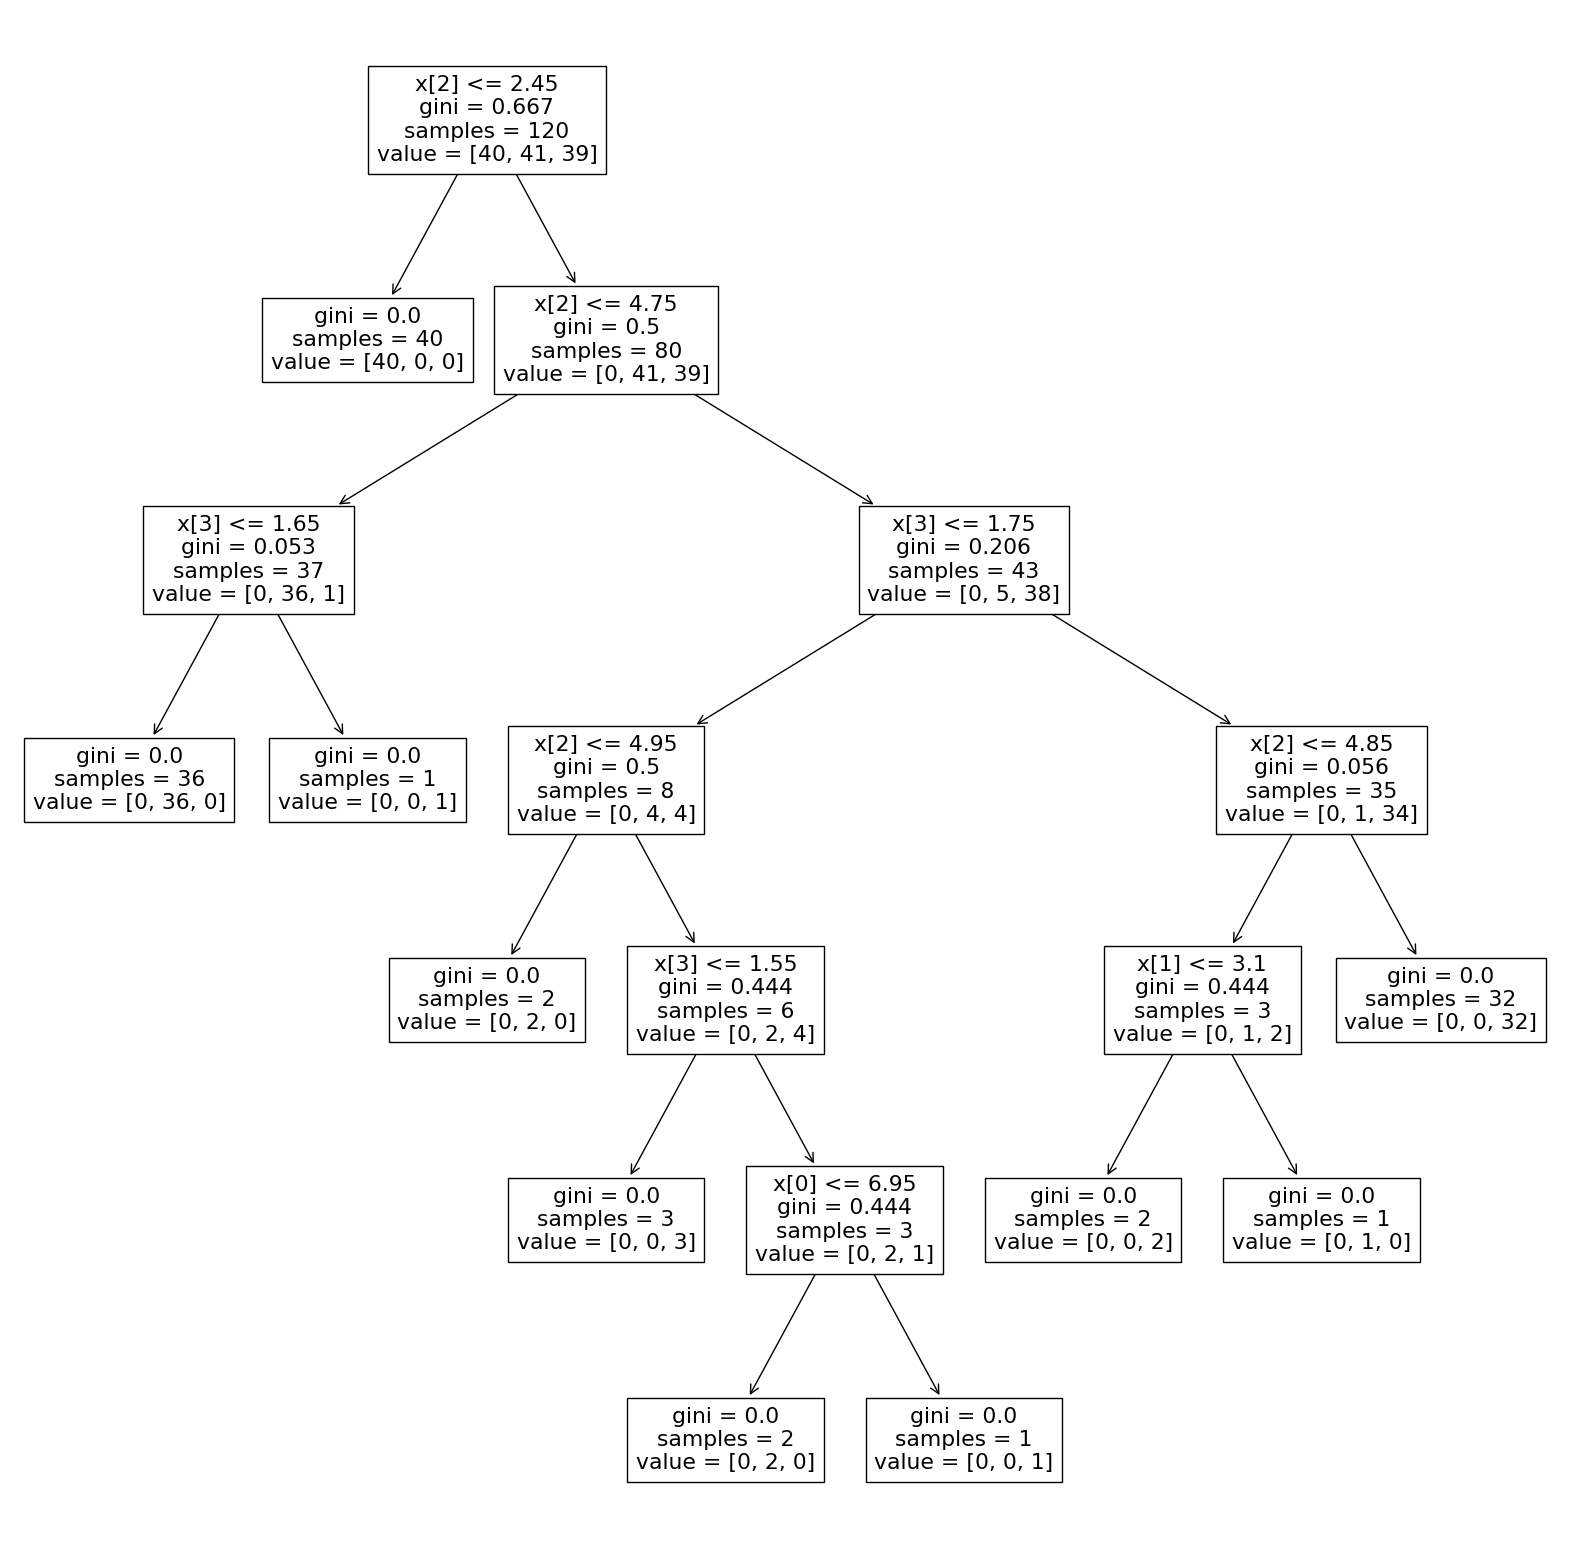

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from data.iris_info import iris_dict
# from iris_info import iris_dict  # Udemy usa esto!!
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Convertir el diccionario a DataFrame
iris_df: pd.DataFrame = pd.DataFrame(iris_dict)

X: pd.DataFrame = iris_df.drop('species', axis=1)

encoder: LabelEncoder = LabelEncoder()
y = encoder.fit_transform(iris_df['species'])

X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(
    X, y, train_size=0.8, random_state=42
)

arbol: DecisionTreeClassifier = DecisionTreeClassifier()
arbol.fit(X_entrena, y_entrena)

plt.figure(figsize=(20, 20))  # ajusta el tamaño del dibujo del árbol!!
plot_tree(decision_tree=arbol)